# DBSCAN  (Density-Based Spatial Clustering of Applications with Noise)

<img src = "images/4.png" width=85%>

<h3>
Key Characteristics of  DBSCAN Algorithm
It does not require the number of clusters as input.
It is can detect outliers while finding clusters.
DBSCAN algorithm can detect clusters that are complex or randomly shaped and sized.
</h3>

## Pre-requisite Concepts for DBSCAN

### i) Epsilon Value (eps)
### ii) Minimum Points minPts
### iii) Types of Points in DBSCAN Clustering
#### Core point:
A core point is one in which at least have minPts number of points (including the point itself) in its surrounding region within the radius eps.
#### Border point:
A border point is one in which is reachable from a core point and there are less than minPts number of points within its surrounding region.
#### Outlier:
An outlier is neither a core point and nor is it reachable from any core points.

<img src = "images/2.png" width=50%>

<img src = "images/G.gif" width=85%>

## v-measure score : an homogeneous and complete clustering

There are two types of validation in clustering, using:

Internal indexes: Used to measure the goodness of a clustering structure without respect to external information (e.g., sum of squared errors)

External indexes: Consists in comparing the results of a cluster analysis to an externally known result, such as externally provided class labels (e.g., Rand index, purity, **v-measure**, etc.)

In [33]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN, KMeans

from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [34]:
# make moon dataset

X, y = make_moons(n_samples=500, noise=0.1)

In [35]:
y

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,

In [36]:
df=pd.DataFrame(X,y)

df=df.rename(columns={0: "X1", 1:"X2"})
df.head()

,X1,X2
0,1.037271,-0.129857
1,1.389422,-0.434921
1,1.949417,-0.198046
1,1.181721,-0.383959
0,0.647557,0.808250


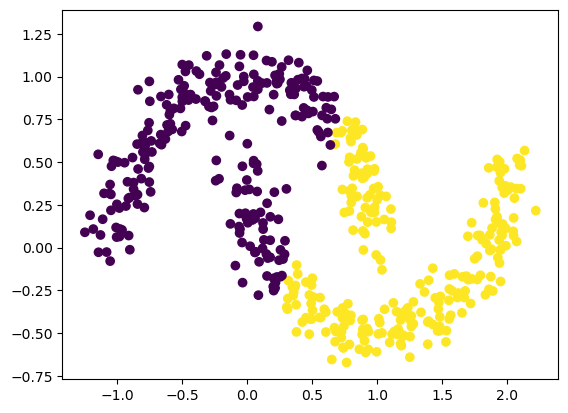

In [37]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

# Visualizing DBSCAN
plt.scatter(
    X[:, 0], 
    X[:, 1], 
    c=kmeans.labels_, 
);


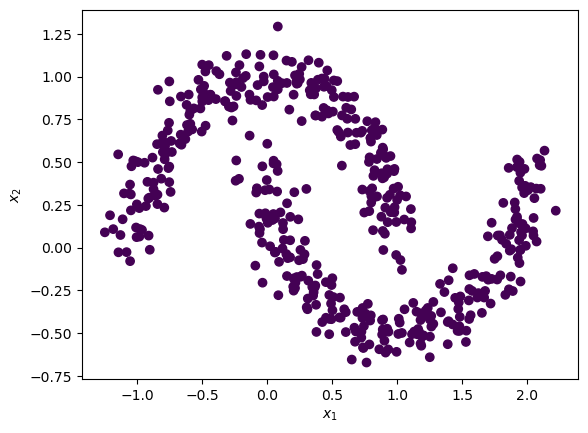

In [38]:
dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(X)

# Visualizing DBSCAN
plt.scatter(
    X[:, 0], 
    X[:, 1], 
    c=dbscan_cluster1.labels_, 
)

plt.xlabel("$x_1$");
plt.ylabel("$x_2$");

In [39]:
# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 1
Estimated no. of noise points: 0
v_measure = 0.0


Estimated no. of clusters: 13
Estimated no. of noise points: 112
v_measure = 0.3472095259490397


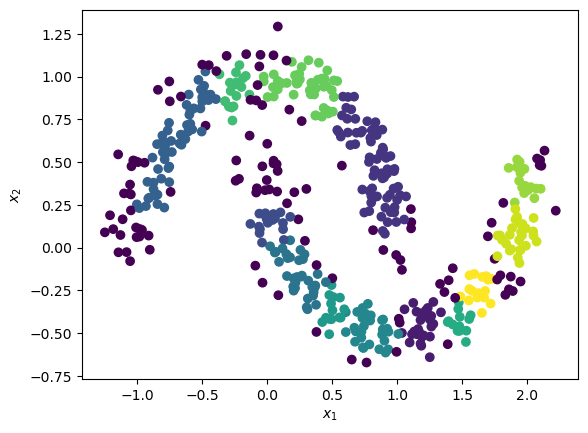

In [40]:
dbscan_cluster = DBSCAN(eps=0.1, min_samples=8)
dbscan_cluster.fit(X)

# Visualizing DBSCAN
plt.scatter(X[:, 0], 
X[:, 1], 
c=dbscan_cluster.labels_, 
)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Text(0, 0.5, 'mean Distance')

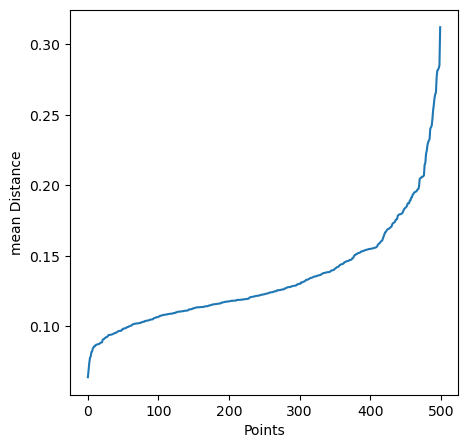

In [41]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=20)
neighbors = nearest_neighbors.fit(df)

distances, indices = neighbors.kneighbors(df)
distances = np.sort(distances[:,10], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("mean Distance")

In [42]:
pd.DataFrame(indices)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,479,180,451,483,425,273,142,370,477,88,71,251,3,340,319,94,405,26,297
1,1,65,87,259,63,274,354,48,421,343,36,356,465,185,38,52,475,240,297,439
2,2,280,146,467,169,60,269,233,445,320,457,136,162,193,396,409,380,299,478,308
3,3,330,370,8,405,319,185,465,483,37,300,36,343,297,378,195,425,318,179,188
4,4,226,50,119,228,217,331,197,393,246,117,256,313,423,80,159,288,157,112,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,294,450,171,362,468,177,406,422,203,292,53,54,135,44,328,174,155,385,433
496,496,23,418,494,328,49,485,301,202,86,433,385,450,205,19,44,54,254,294,495
497,497,317,444,125,416,191,404,491,493,66,225,401,194,339,152,184,22,349,153,403
498,498,312,436,12,132,306,371,6,302,20,121,160,449,234,141,395,338,229,192,315


In [43]:
print(distances)
print('shape of distances =',len(distances))

[0.06392583 0.06938558 0.07429494 0.07777915 0.07860717 0.08186195
 0.08218595 0.08433823 0.08508594 0.08591898 0.08592873 0.08664135
 0.08707997 0.08707997 0.08721317 0.08745634 0.0874916  0.08808918
 0.08840697 0.08851227 0.08864231 0.09060753 0.09083807 0.0910642
 0.09163578 0.09203043 0.09236549 0.0924481  0.09285109 0.09379005
 0.09385888 0.09391661 0.09396072 0.09410258 0.09423755 0.0945033
 0.09482249 0.0949515  0.09522892 0.09537973 0.09547875 0.09586742
 0.09625118 0.09656737 0.09676282 0.09678888 0.09680399 0.09683279
 0.09762463 0.0977508  0.09840084 0.09841661 0.09852006 0.09869581
 0.09879301 0.0993588  0.09948655 0.09959616 0.09993326 0.10012556
 0.10024296 0.10046575 0.1006957  0.10129525 0.10153176 0.10169217
 0.10174287 0.10187102 0.10201828 0.10204031 0.10209594 0.10213662
 0.10226715 0.10246536 0.10255914 0.10257935 0.10296599 0.10296626
 0.10324461 0.10331598 0.1033161  0.10383468 0.1039007  0.10395651
 0.10408093 0.10412387 0.10425531 0.10452079 0.10463337 0.104863

0.1689831612233789


<Figure size 500x500 with 0 Axes>

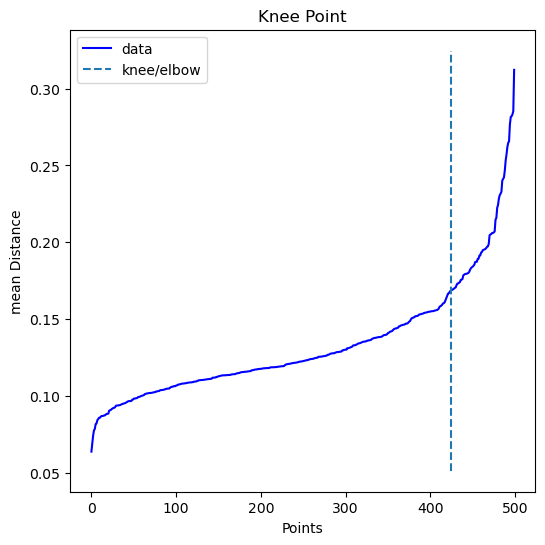

In [44]:
#!pip install kneed
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("mean Distance")

print(distances[knee.knee])

Estimated no. of clusters: 2
Estimated no. of noise points: 9
v_measure = 0.9135316209575012


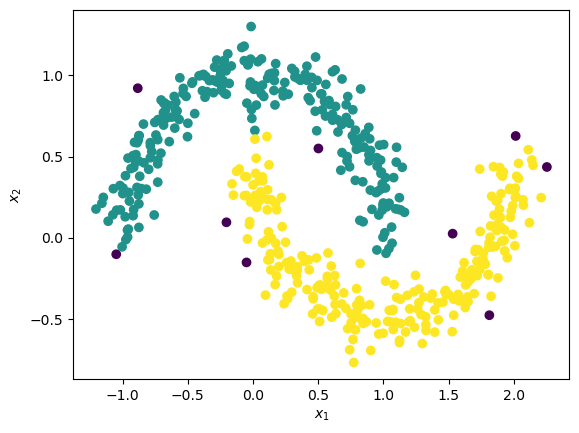

In [29]:
dbscan_cluster = DBSCAN(eps=0.163 , min_samples=10)
dbscan_cluster.fit(X)

# Visualizing DBSCAN
plt.scatter(X[:, 0], 
X[:, 1], 
c=dbscan_cluster.labels_, 
label=y)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

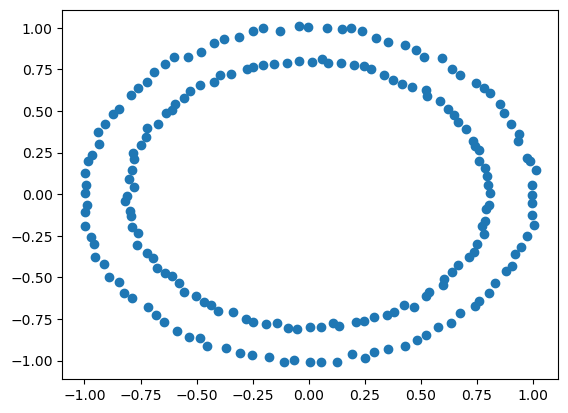

In [30]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=200, noise=0.01)
plt.scatter(X[:,0], X[:,1])


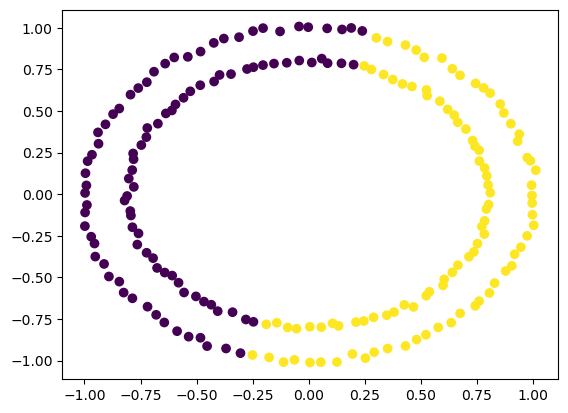

In [31]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

# Visualizing DBSCAN
plt.scatter(
    X[:, 0], 
    X[:, 1], 
    c=kmeans.labels_, 
)

Estimated no. of clusters: 2
Estimated no. of noise points: 0


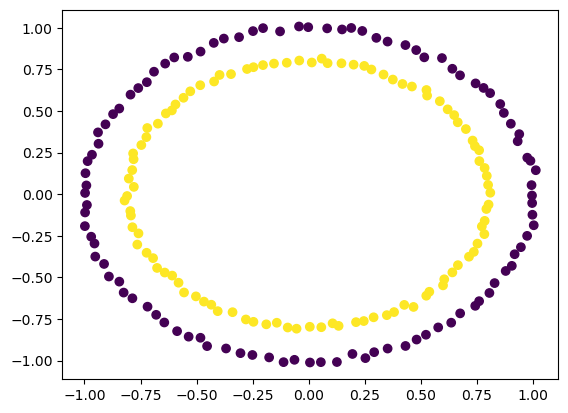

In [32]:
dbscan_cluster = DBSCAN(eps=0.1, min_samples=2)
dbscan_cluster.fit(X)

# Visualizing DBSCAN
plt.scatter(X[:, 0], 
X[:, 1], 
c=dbscan_cluster.labels_, 
label=y)

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)